In [1]:
# Python Code for Group Work Machine Learning
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import json_normalize
import glob

In [2]:
df_slim_rotterdam = pd.read_json('df_slim_rotterdam.json', orient='records')

In [3]:
df_wide_rotterdam = pd.read_json('df_wide_rotterdam.json', orient='records')

In [4]:
import ipywidgets as widgets
from IPython.display import display
from mpl_toolkits.basemap import Basemap
from sklearn.cluster import KMeans, DBSCAN
from mpl_toolkits.basemap import Basemap
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [5]:
df_slim_rotterdam.describe()

,navigation.time,navigation.location.long,navigation.location.lat,device.mmsi,vessel.imo,day,hour,minute
count,3.004300e+04,30043.000000,30043.000000,3.004300e+04,30043.0,30043.000000,30043.000000,30043.000000
mean,1.610790e+12,4.201717,51.918206,2.413457e+08,0.0,15.901341,11.412642,28.825017
std,7.435642e+08,0.178552,0.039834,9.788899e+06,0.0,8.605918,6.844214,17.265774
min,1.609459e+12,4.000020,51.805470,2.115602e+08,0.0,1.000000,0.000000,0.000000
25%,1.610121e+12,4.032980,51.881020,2.446300e+08,0.0,8.000000,6.000000,15.000000
50%,1.610814e+12,4.169250,51.930500,2.446307e+08,0.0,16.000000,11.000000,30.000000
75%,1.611428e+12,4.376845,51.957740,2.447008e+08,0.0,23.000000,17.000000,45.000000
max,1.612137e+12,4.599940,51.979860,2.447500e+08,0.0,31.000000,23.000000,59.000000


In [6]:
df_wide_rotterdam.describe()

,navigation.time,navigation.location.long,navigation.location.lat,device.mmsi,vessel.imo,day,hour,minute
count,3.247000e+04,32470.000000,32470.000000,3.247000e+04,3.247000e+04,32470.000000,32470.000000,32470.000000
mean,1.610837e+12,4.190861,51.921080,2.412286e+08,6.933203e+05,16.448168,11.418355,28.815430
std,7.528387e+08,0.176716,0.039831,1.036823e+07,2.440078e+06,8.710062,6.836121,17.264886
min,1.609459e+12,4.000020,51.805470,2.115602e+08,0.000000e+00,1.000000,0.000000,0.000000
25%,1.610170e+12,4.032560,51.882400,2.446300e+08,0.000000e+00,9.000000,6.000000,15.000000
50%,1.610932e+12,4.093760,51.940540,2.446307e+08,0.000000e+00,18.000000,11.000000,30.000000
75%,1.611496e+12,4.325045,51.957810,2.447008e+08,0.000000e+00,24.000000,17.000000,45.000000
max,1.612137e+12,4.599940,51.999620,3.099370e+08,9.619969e+06,31.000000,23.000000,59.000000


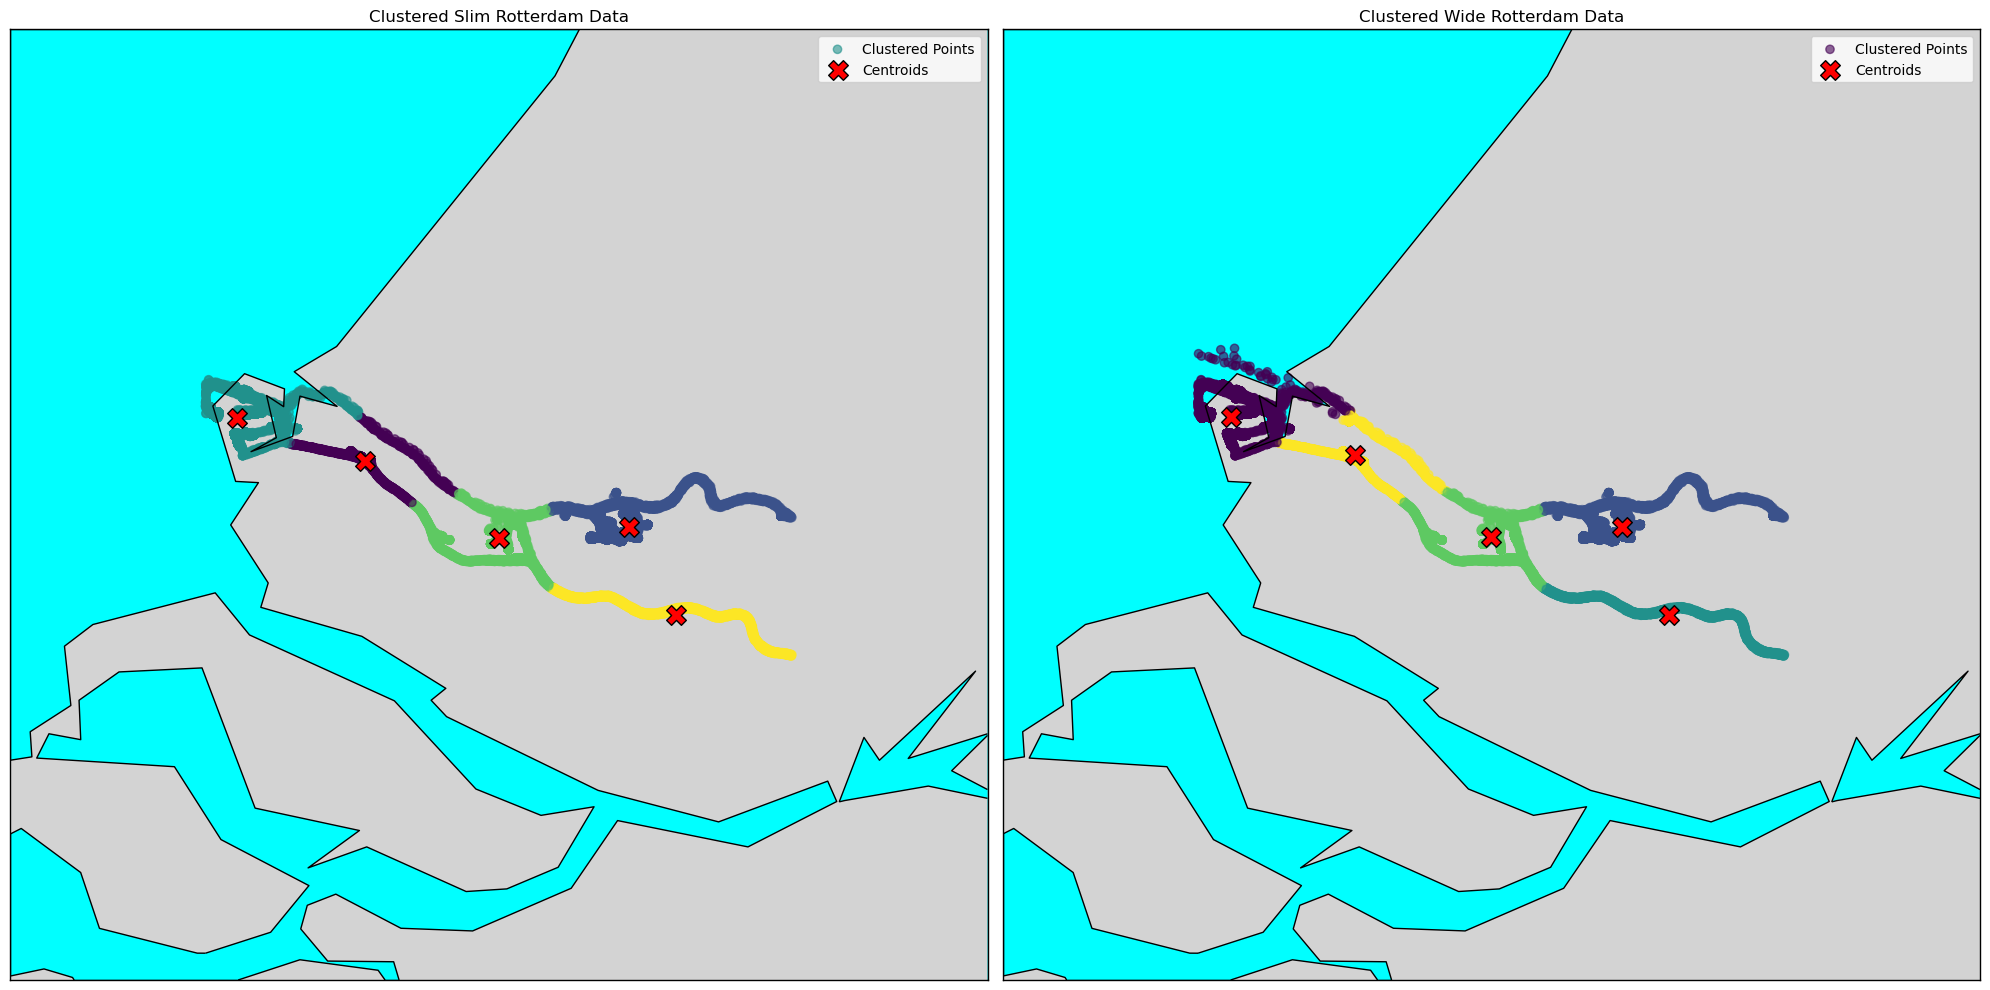

In [7]:
# Function to apply clustering and plot results with centroids
def plot_clustered_map(df, title, ax, clustering_method='kmeans', n_clusters=4):
    # Extract coordinates
    coords_not_scaled = df[['navigation.location.long', 'navigation.location.lat']].values

    scaler = StandardScaler()
    coords = scaler.fit_transform(coords_not_scaled)  
    
    # Apply clustering
    if clustering_method == 'kmeans':
        model = KMeans(n_clusters=n_clusters, random_state=42, init="k-means++")
        clusters = model.fit_predict(coords)
        centroids = model.cluster_centers_
    elif clustering_method == 'dbscan':
        model = DBSCAN(eps=0.01, min_samples=5)  # Adjust parameters as needed
        clusters = model.fit_predict(coords)
        centroids = None  # DBSCAN does not have centroids
    else:
        raise ValueError("Invalid clustering method")
    
    df['cluster'] = clusters
    
    # Create Basemap
    m = Basemap(projection='merc', llcrnrlat=51.6, urcrnrlat=52.2,
                llcrnrlon=3.8, urcrnrlon=4.8, resolution='i', ax=ax)
    m.drawcoastlines()
    m.drawcountries()
    m.drawmapboundary(fill_color='aqua')
    m.fillcontinents(color='lightgray', lake_color='aqua')
    
    # Map coordinates to Basemap projection
    x, y = m(df['navigation.location.long'].values, df['navigation.location.lat'].values)
    
    # Plot clusters
    scatter = ax.scatter(x, y, c=df['cluster'], cmap='viridis', alpha=0.6, label='Clustered Points')

    # Plot centroids if available
    if clustering_method == 'kmeans' and centroids is not None:
        # Transform centroids back to original coordinates
        centroids_original = scaler.inverse_transform(centroids)
        centroids_x, centroids_y = m(centroids_original[:, 0], centroids_original[:, 1])
        
        ax.scatter(centroids_x, centroids_y, marker='X', s=200, c='red', edgecolors='black', label='Centroids')
    
    ax.legend()
    ax.set_title(title)
    
    return scatter

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

# Plot clustered maps for slim and wide datasets
plot_clustered_map(df_slim_rotterdam, 'Clustered Slim Rotterdam Data', axes[0], clustering_method='kmeans', n_clusters=5)
plot_clustered_map(df_wide_rotterdam, 'Clustered Wide Rotterdam Data', axes[1], clustering_method='kmeans', n_clusters=5)

plt.tight_layout()
plt.show()

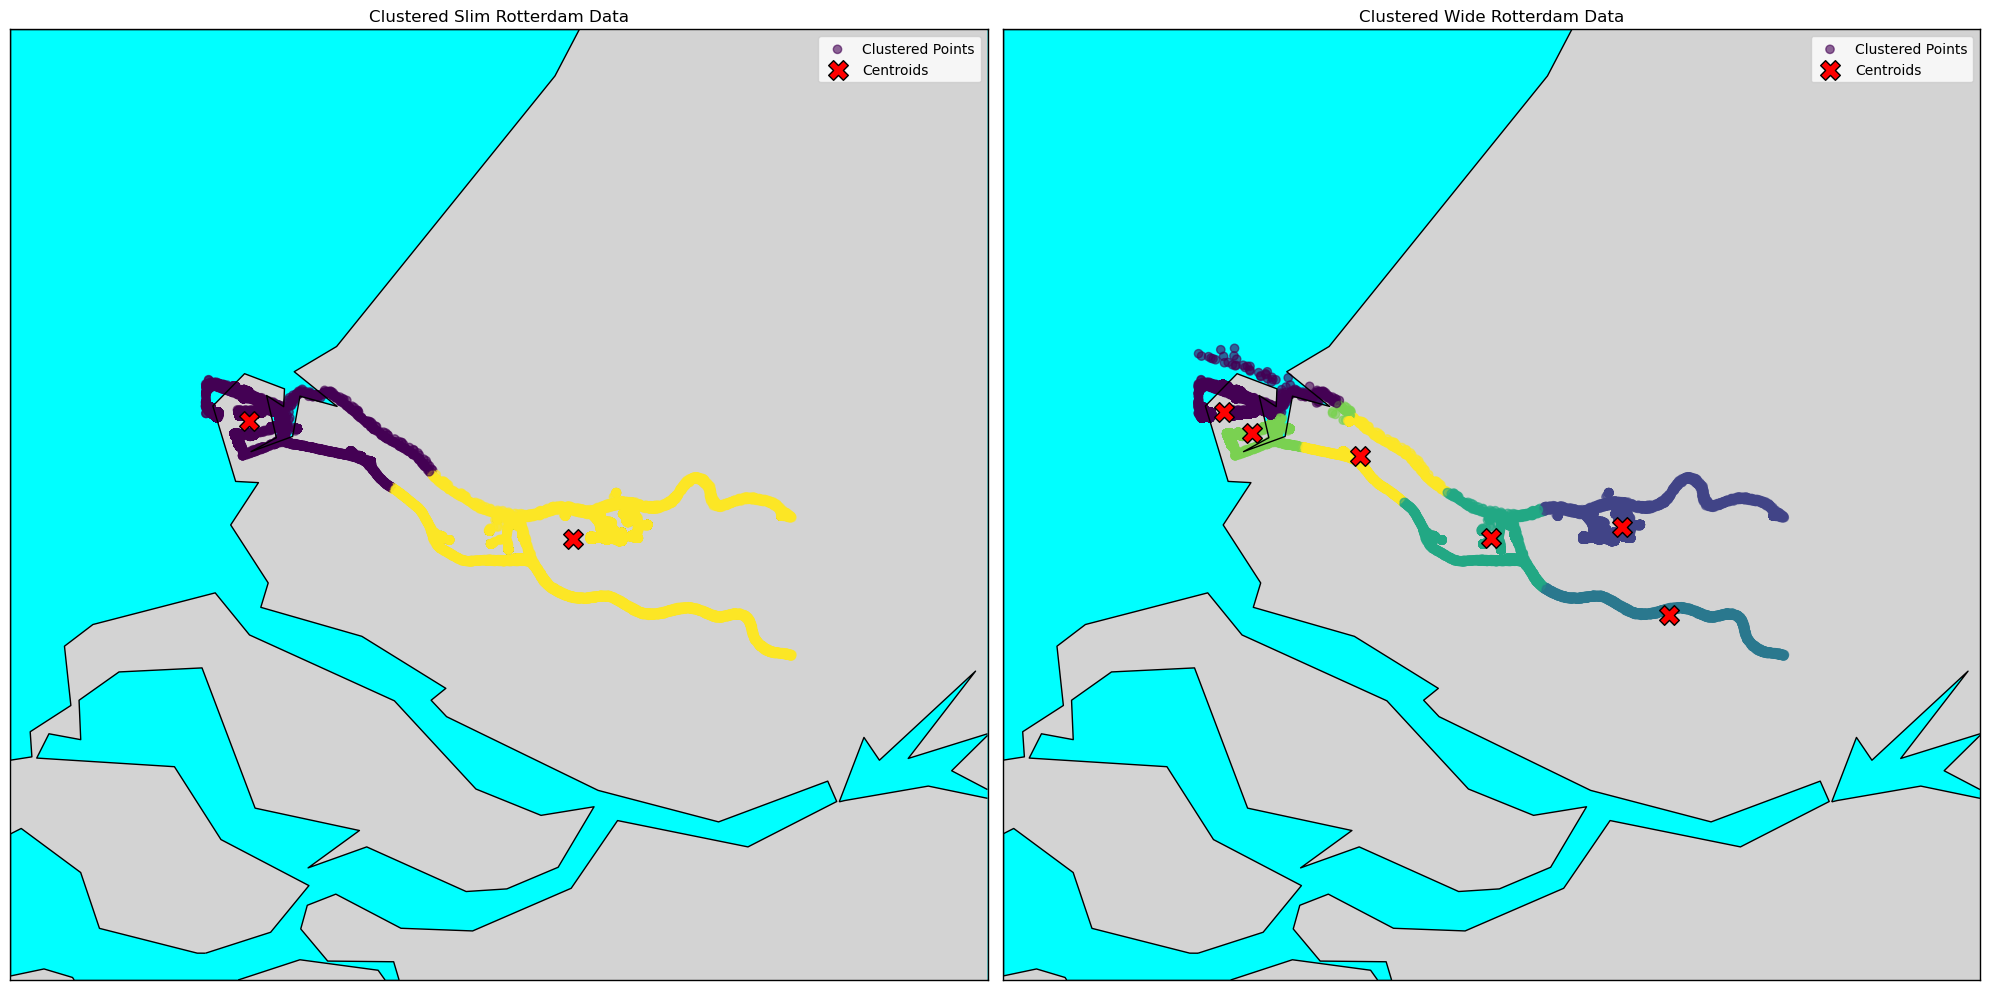

In [8]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

# Plot clustered maps for slim and wide datasets
plot_clustered_map(df_slim_rotterdam, 'Clustered Slim Rotterdam Data', axes[0], clustering_method='kmeans', n_clusters=2)
plot_clustered_map(df_wide_rotterdam, 'Clustered Wide Rotterdam Data', axes[1], clustering_method='kmeans', n_clusters=6)

plt.tight_layout()
plt.show()

Elbow Method and Silhouette Score for Slim Rotterdam Data (Standard Scaled)


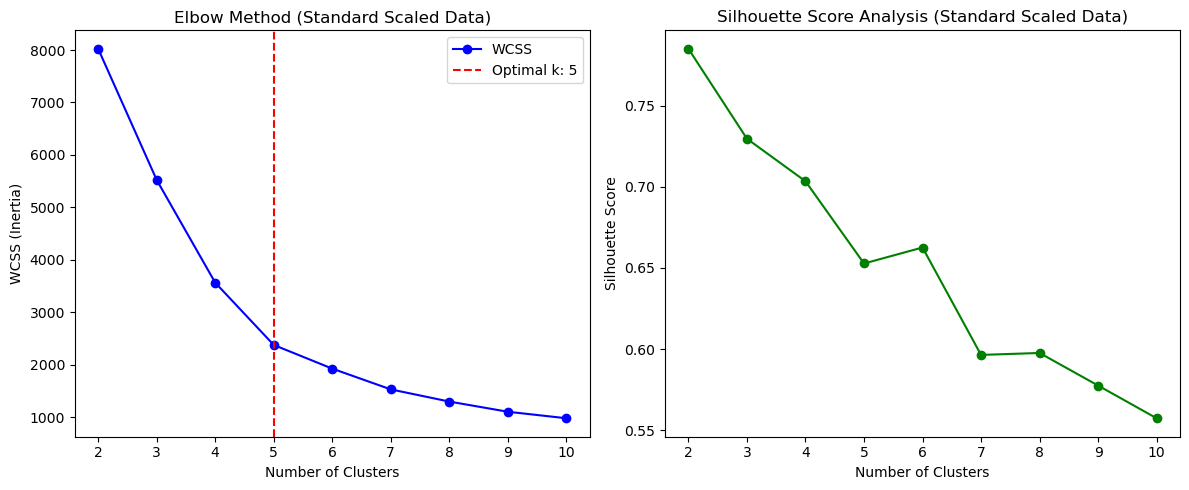

Optimal number of clusters based on KneeLocator: 5
   Num Clusters  Silhouette Score
0             2          0.784961
1             3          0.729566
2             4          0.703397
3             5          0.652741
4             6          0.662589
5             7          0.596435
6             8          0.597639
7             9          0.577582
8            10          0.557431

Elbow Method and Silhouette Score for Wide Rotterdam Data (Standard Scaled)


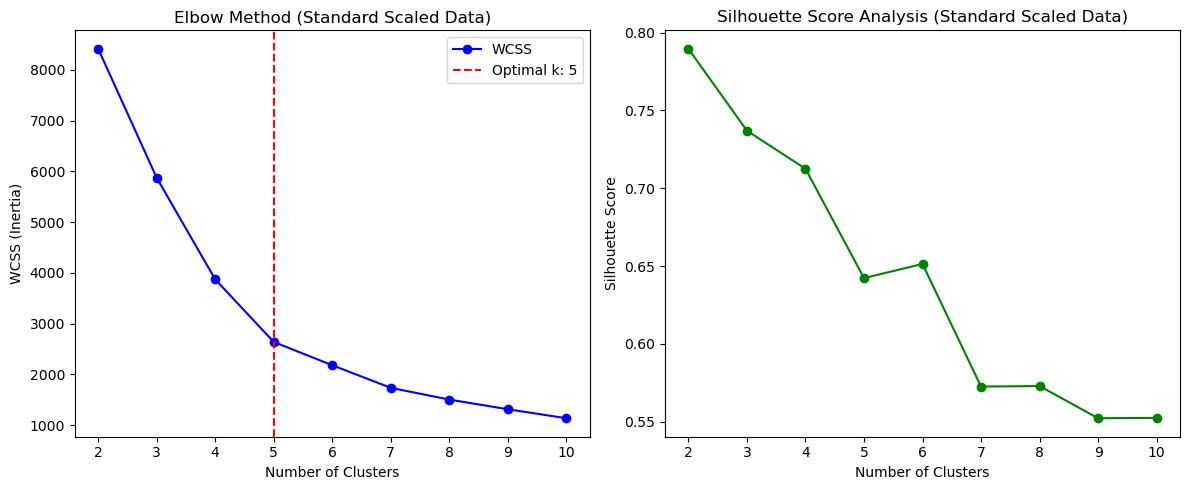

Optimal number of clusters based on KneeLocator: 5
   Num Clusters  Silhouette Score
0             2          0.789535
1             3          0.736908
2             4          0.712499
3             5          0.642272
4             6          0.651350
5             7          0.572583
6             8          0.572946
7             9          0.552252
8            10          0.552483


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

def elbow_method_and_silhouette_minmax(df, max_clusters=10):
    # Apply MinMaxScaler
    scaler = StandardScaler()
    coords_scaled = scaler.fit_transform(df[['navigation.location.long', 'navigation.location.lat']].values)
    
    wcss = []  # Within-Cluster Sum of Squares
    silhouette_scores = []  # Silhouette scores storage
    
    cluster_range = range(2, max_clusters + 1)
    
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(coords_scaled)
        
        wcss.append(kmeans.inertia_)  # Inertia (WCSS)
        silhouette_scores.append(silhouette_score(coords_scaled, labels))
    
    # Find optimal number of clusters using KneeLocator
    kneedle = KneeLocator(cluster_range, wcss, curve="convex", direction="decreasing")
    optimal_k = kneedle.elbow
    
    # Create a DataFrame with silhouette scores
    silhouette_df = pd.DataFrame({
        'Num Clusters': list(cluster_range),
        'Silhouette Score': silhouette_scores
    })

    # Plot Elbow Method with KneeLocator optimal K
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(cluster_range, wcss, marker='o', linestyle='-', color='b', label="WCSS")
    if optimal_k:
        plt.axvline(x=optimal_k, linestyle="--", color="r", label=f"Optimal k: {optimal_k}")
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS (Inertia)')
    plt.title('Elbow Method (Standard Scaled Data)')
    plt.legend()
    
    # Plot Silhouette Scores
    plt.subplot(1, 2, 2)
    plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='g')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Analysis (Standard Scaled Data)')
    
    plt.tight_layout()
    plt.show()

    print(f"Optimal number of clusters based on KneeLocator: {optimal_k}")
    
    return silhouette_df

# Apply for df_slim_rotterdam
print("Elbow Method and Silhouette Score for Slim Rotterdam Data (Standard Scaled)")
silhouette_df_slim = elbow_method_and_silhouette_minmax(df_slim_rotterdam)
print(silhouette_df_slim)

# Apply for df_wide_rotterdam
print("\nElbow Method and Silhouette Score for Wide Rotterdam Data (Standard Scaled)")
silhouette_df_wide = elbow_method_and_silhouette_minmax(df_wide_rotterdam)
print(silhouette_df_wide)